<table>
  <tr>
    <td> <b> Roll no.: </b> N031 </td>
    <td> <b> Name: </b> Shourya Gupta </td>
  </tr>
  <tr>
    <td> <b> Program and Division: </b> MBA Tech CE D</td>
    <td> <b> Batch: </b> B1 </td>
  </tr>   
</table>

# **Experiment 09**

## **Stock Market Prediction using LSTM**

In [ ]:
!pip install yfinance

import yfinance as yf
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
import numpy as np

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

### **Step 1: Load the dataset in the notebook**

In [ ]:
# fetching historical market data for Ubisoft Entertainment SA (UBI.PA)
ticker = 'UBI.PA'
data = yf.download(ticker, start='2010-01-01', end='2024-01-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
print(data.head())

             Open   High     Low   Close  Adj Close   Volume
Date                                                        
2010-01-04  10.01  10.24  10.010  10.135     10.135  2987214
2010-01-05  10.20  10.75  10.140  10.540     10.540  4682584
2010-01-06  10.78  11.29  10.755  11.080     11.080  3279261
2010-01-07  11.18  11.28  10.850  11.005     11.005  3702840
2010-01-08  11.05  11.25  10.850  10.970     10.970  1422595


### **Step 2: Select the appropriate feature for creating the model from the training data**

In [ ]:
# choosing 'Close' price as the feature for prediction
close_data = data['Close']
close_data.head()

,Close
Date,
2010-01-04,10.135
2010-01-05,10.540
2010-01-06,11.080
2010-01-07,11.005
2010-01-08,10.970


### **Step 3: Normalize the features and convert it into time stamps of 60**

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_data.values.reshape(-1, 1))

In [ ]:
print(scaled_data[:5])

[[0.06456424]
 [0.06861764]
 [0.07402218]
 [0.07327155]
 [0.07292126]]


In [ ]:
# Convert the scaled feature into time stamps of 60
# the stock prices for 60 days and the O/P is the stock price on the 61st day
time_step = 60

def create_sequences(data, seq_length):
    # to store the sequences and target values
    X_train = []
    y_train = []
    for i in range(seq_length, len(data)):
      X_train.append(scaled_data[i-time_step:i, 0])
      y_train.append(scaled_data[i, 0])
    return np.array(X_train), np.array(y_train)

X_train, y_train = create_sequences(scaled_data, time_step)

print("Shape of X:", X_train.shape)
print("Shape of y:", y_train.shape)

Shape of X: (3523, 60)
Shape of y: (3523,)


### **Step 4: Reshape the data (3 D array) for applying to the LSTM model**

In [ ]:
# LSTM models expect 3D input with the shape (samples, time_steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print("Reshaped X:", X_train.shape)

Reshaped X: (3523, 60, 1)


### **Step 5: Create a sequential LSTM model using Keras**

In [ ]:
# building a multi-layer LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### **Step 6: Compile the model and train it using the training data**

In [ ]:
# compiling
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# training
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 28s 209ms/step - loss: 0.0275 - val_loss: 8.6151e-04
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - loss: 0.0026 - val_loss: 0.0022
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 12s 104ms/step - loss: 0.0021 - val_loss: 8.6514e-04
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - loss: 0.0022 - val_loss: 0.0026
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - loss: 0.0032 - val_loss: 6.5143e-04
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 9/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - loss: 0.0019 - val_loss: 5.4927e-04
Epoch 10/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - loss: 0.0014 - val_loss: 6.1731e-04


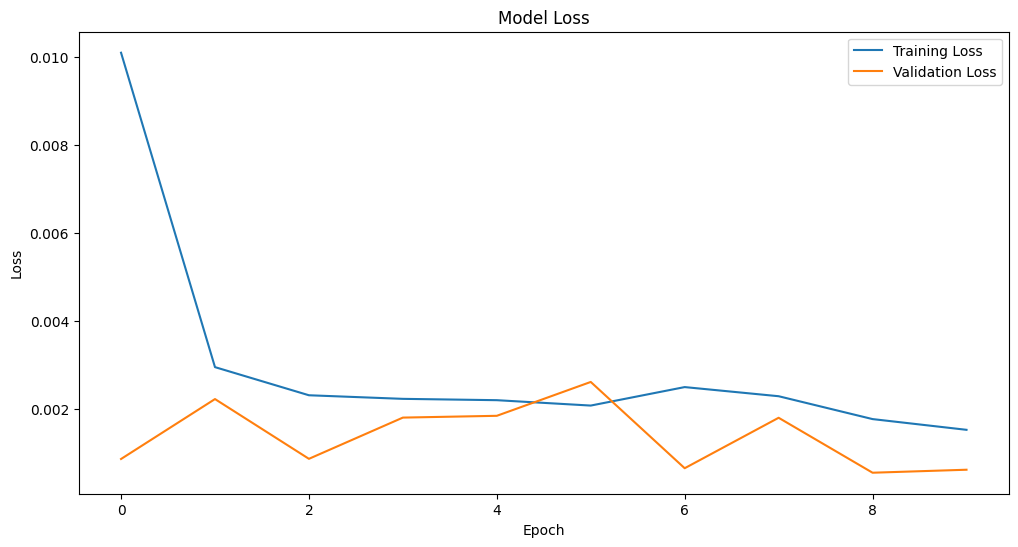

In [ ]:
# plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### **Step 7: Predict using the test data**

In [ ]:
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

X_test = []
y_test = []

for i in range(time_step, len(test_data)):
    X_test.append(test_data[i-time_step:i, 0])  # the 60 previous days
    y_test.append(test_data[i, 0])  # the 61st day

X_test = np.array(X_test)
y_test = np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predictions = model.predict(X_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step


In [ ]:
# Reverse Scaling
# since the predictions are scaled between 0 and 1
# need to reverse the scaling to bring them back to the original stock price range

predicted = scaler.inverse_transform(predictions)

actual = scaler.inverse_transform(y_test.reshape(-1, 1))

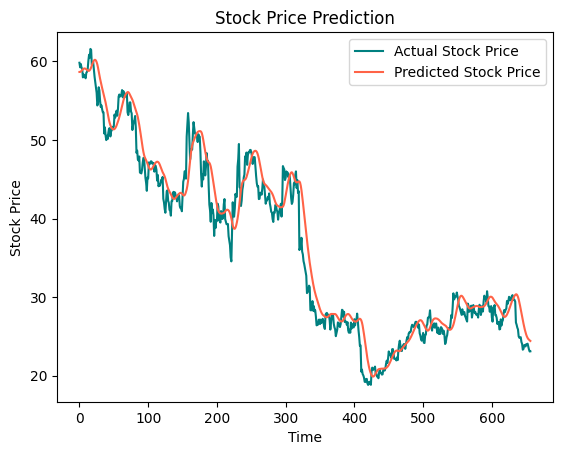

In [ ]:
# visualizations
plt.plot(actual, color='teal', label='Actual Stock Price')
plt.plot(predicted, color='tomato', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
# evaluating the model
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 6.065455619970583
Root Mean Squared Error: 2.4628145727948305


## **Observation and Learning**

The LSTM model can be helpful in capturing stock price trends but may not perfectly predict short-term fluctuations. Data preprocessing and hyperparameter tuning are vital for improving prediction accuracy.

## **Conclusion**

Explored the LSTM model, used it for stock prediction. Used the model on UBI.PA historical data.

In [ ]:
def colab2pdf():
  # @title Download Notebook in PDF Format{display-mode:'form'}
  !apt-get install -yqq --no-install-recommends librsvg2-bin>/dev/null;
  import contextlib,datetime,google,io,IPython,ipywidgets,json,locale,nbformat,os,pathlib,requests,urllib,warnings,werkzeug,yaml,re;locale.setlocale(locale.LC_ALL,'en_US.UTF-8');warnings.filterwarnings('ignore',category=nbformat.validator.MissingIDFieldWarning);
  %matplotlib inline
  def convert(b):
    try:
      s.value='🔄 Converting';b.disabled=True
      n=pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f'http://{os.environ["COLAB_JUPYTER_IP"]}:{os.environ["KMP_TARGET_PORT"]}/api/sessions').json()[0]['name'])))
      p=pathlib.Path('/content/pdfs')/f'{datetime.datetime.utcnow().strftime("%Y%m%d_%H%M%S")}_{n.stem}';p.mkdir(parents=True,exist_ok=True);nb=nbformat.reads(json.dumps(google.colab._message.blocking_request('get_ipynb',timeout_sec=600)['ipynb']),as_version=4)
      u=[u for c in nb.cells if c.get('cell_type')=='markdown' for u in re.findall(r'!\[.*?\]\((https?://.*?)\)',c['source']) if requests.head(u,timeout=5).status_code!=200]
      if u:raise Exception(f"Bad Image URLs: {','.join(u)}")
      nb.cells=[cell for cell in nb.cells if '--Colab2PDF' not in cell.source]
      nb=nbformat.v4.new_notebook(cells=nb.cells or [nbformat.v4.new_code_cell('#')]);nbformat.validator.normalize(nb)
      nbformat.write(nb,(p/f'{n.stem}.ipynb').open('w',encoding='utf-8'))
      with (p/'config.yml').open('w', encoding='utf-8') as f: yaml.dump({'include-in-header':[{'text':r'\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}'}],'include-before-body':[{'text':r'\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}'}]},f)
      !quarto render {p}/{n.stem}.ipynb --metadata-file={p}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
      google.colab.files.download(str(p/f'{n.stem}.pdf'));s.value=f'✅ Downloaded: {n.stem}.pdf'
    except Exception as e:s.value=f'❌ {str(e)}'
    finally:b.disabled=False
  if not pathlib.Path('/usr/local/bin/quarto').exists():
    !wget -q 'https://quarto.org/download/latest/quarto-linux-amd64.deb' && dpkg -i quarto-linux-amd64.deb>/dev/null && quarto install tinytex --update-path --quiet && rm quarto-linux-amd64.deb
  b=ipywidgets.widgets.Button(description='⬇️ Download');s=ipywidgets.widgets.Label();b.on_click(lambda b:convert(b));IPython.display.display(ipywidgets.widgets.HBox([b,s]))
colab2pdf() # | Colab2PDF v1.6 | https://github.com/drengskapur/colab2pdf | GPL-3.0-or-later |

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>